# Bagging and pasting regression

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

concrete_data = pd.read_csv('data/concrete_data.csv')
concrete_data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Text(0, 0.5, 'csMPa')

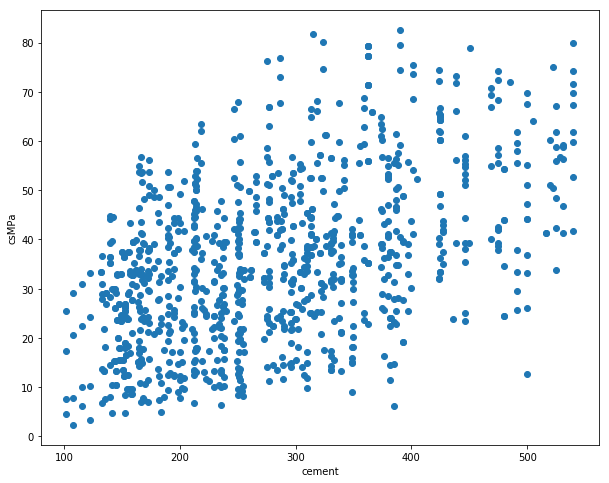

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(concrete_data['cement'], concrete_data['csMPa'])
plt.xlabel('cement')
plt.ylabel('csMPa')

Text(0, 0.5, 'csMPa')

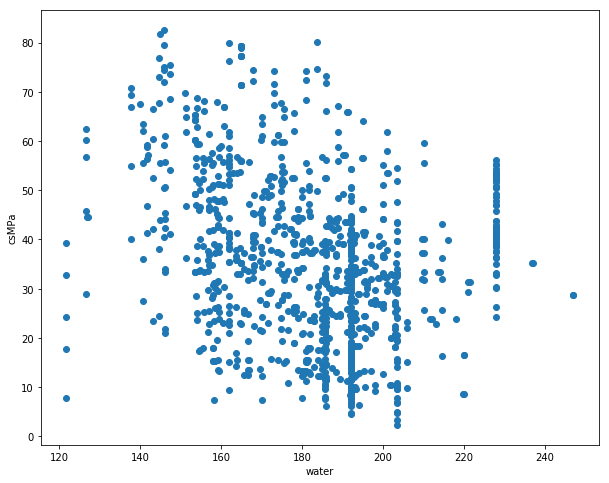

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(concrete_data['water'], concrete_data['csMPa'])
plt.xlabel('water')
plt.ylabel('csMPa')

Text(0, 0.5, 'csMPa')

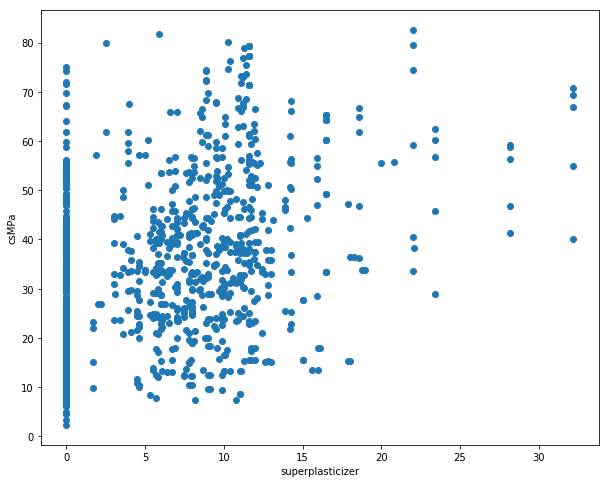

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(concrete_data['superplasticizer'], concrete_data['csMPa'])
plt.xlabel('superplasticizer')
plt.ylabel('csMPa')

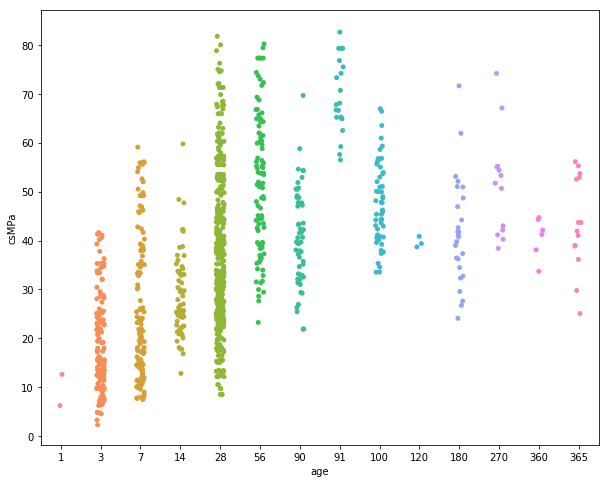

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.stripplot(concrete_data['age'], concrete_data['csMPa'])

Text(0, 0.5, 'superplasticizer')

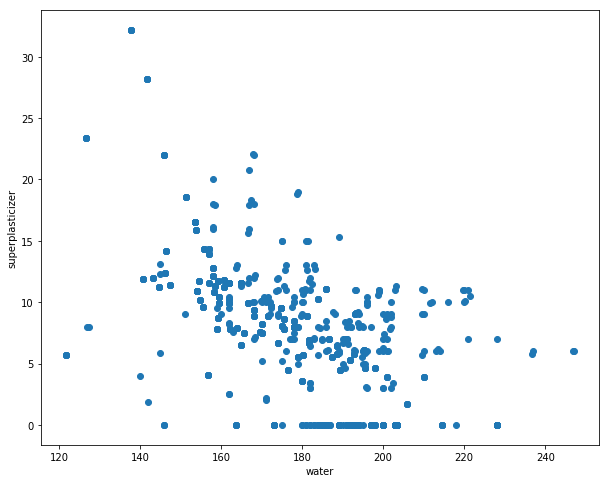

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(concrete_data['water'], concrete_data['superplasticizer'])
plt.xlabel('water')
plt.ylabel('superplasticizer')

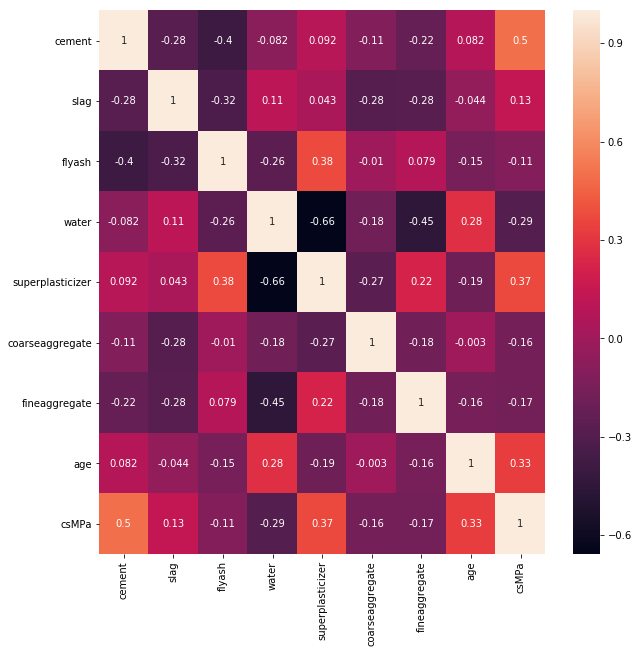

In [8]:
concrete_data_corr = concrete_data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(concrete_data_corr, annot=True)

In [9]:
X = concrete_data.drop('csMPa', axis=1)
Y = concrete_data['csMPa']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

## Pasting

Here we perform sampling without replacement (bootstrap=False), this method is called pasting

In [11]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators = 500,
                           bootstrap = False,
                           max_samples = 1.0,
                           n_jobs = -1)

bag_reg.fit(x_train, y_train)
y_pred = bag_reg.predict(x_test)
df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

df.sample(10)

,Actual,Predicted
596,10.73,16.67510
658,25.89,24.84768
1008,35.31,32.83132
733,33.61,32.72000
872,32.40,33.57952
90,40.60,30.25460
894,29.72,29.73000
60,54.38,55.06000
719,43.57,37.36224
213,35.34,40.27810


In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8138860338618885

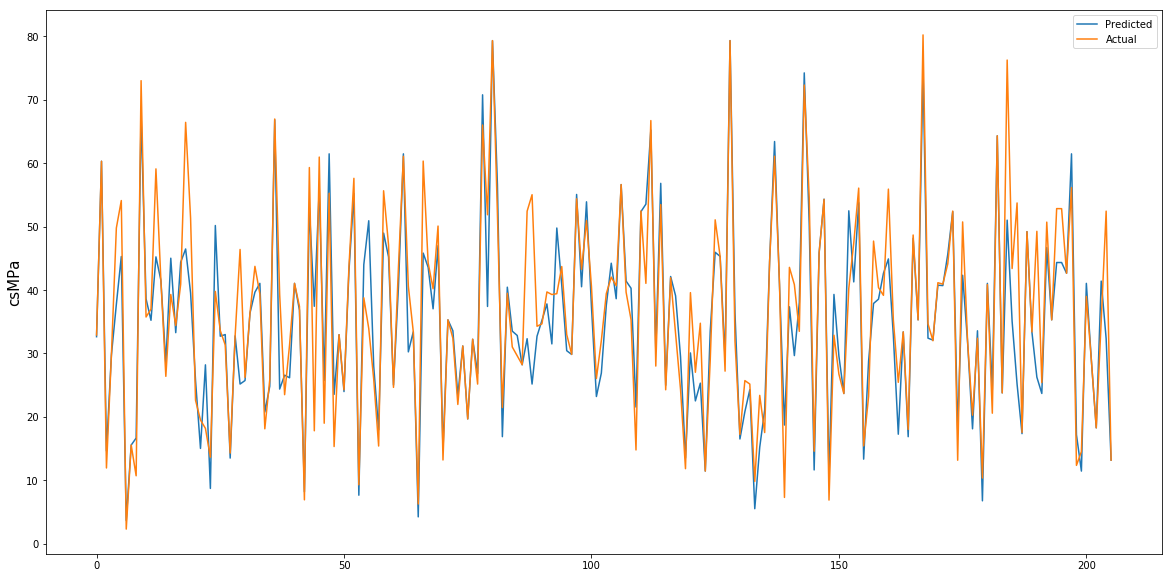

In [13]:
plt.figure(figsize = (20, 10))
plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('csMPa', fontsize=15)
plt.legend()
plt.show()

## Bagging

Here we perform sampling with replacement (bootstrap=True), this method is called bagging. 

So 63% of the training instances are sampled on average for each predictor. By setting oob_score=True we are doing an automatic evaluation after training using the remaining 37% of the training instance which is not sampled and this data is called out-of-bags(oob).

In [14]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators = 500,
                           bootstrap = True,
                           max_samples = 0.8,
                           n_jobs = -1,
                           oob_score = True)

bag_reg.fit(x_train, y_train)
y_pred = bag_reg.predict(x_test)
r2_score(y_test, y_pred)

0.891489003398362

## Random Subspaces

- Keep all the training instances (bootstrap=False and max_samples=1.0) 
- But sample features (bootstrap_features=True and/or max_features=smaller than 1) 

In [15]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators=500,
                           bootstrap=False,
                           max_samples=1.0,
                           bootstrap_features=True,
                           max_features=0.8,
                           n_jobs=-1)

bag_reg.fit(x_train, y_train)
y_pred = bag_reg.predict(x_test)
r2_score(y_test, y_pred)

0.7858181423287871

# Bagging and pasting classification

In [17]:
import pandas as pd

bank_data = pd.read_csv('data/bank_data_processed.csv')
X = bank_data.drop('CreditCard', axis=1)
Y = bank_data['CreditCard']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators = 400,
                            bootstrap = False,
                            max_samples = 1.0,
                            n_jobs = -1)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7291666666666666

In [19]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators = 400,
                            bootstrap = True,
                            max_samples = 0.7,
                            n_jobs = -1,
                            oob_score = True)

bag_clf.fit(x_train, y_train)
bag_clf.oob_score_

y_pred = bag_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.78125

In [20]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators = 400,
                            bootstrap = False,
                            max_samples = 100,
                            bootstrap_features = True,
                            max_features = 0.8,
                            n_jobs = -1)

bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.75

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        60
           1       0.77      0.47      0.59        36

    accuracy                           0.75        96
   macro avg       0.76      0.69      0.70        96
weighted avg       0.75      0.75      0.73        96

